# Data Exploration Notebook

<img src="header/de_header.jpg"  width="400"/>

---

*The following information was taken from the UCI Machine Learning Repository*. The dataset provides patient reviews on specific drugs along with related conditions and a 10 star patient rating reflecting overall patient satisfaction. The data was obtained by crawling online pharmaceutical review sites. The data is split into a train (75%) a test (25%) partition and stored in two .tsv files. The data sets both have the following features:
1. drugName (categorical): name of drug
2. condition (categorical): name of condition
3. review (text): patient review
4. rating (numerical): 10 star patient rating
5. date (date): date of review entry
6. usefulCount (numerical): number of users who found review useful



**Citation Requested by UCI**: Felix Gräßer, Surya Kallumadi, Hagen Malberg, and Sebastian Zaunseder. 2018. Aspect-Based Sentiment Analysis of Drug Reviews Applying Cross-Domain and Cross-Data Learning. In Proceedings of the 2018 International Conference on Digital Health (DH '18). ACM, New York, NY, USA, 121-125.

---

The purpose of this notebook will be to explore the training data, finding any trends or discoveries before processing it for the model (which will take place inside of the modeling notebook). Below includes topics that were explored and their corresponding secionts:

1. Initial Data Exploration
    - Asses the distribution of our numeric features and determine if any changes need to be made.
    - Drop all missing values for exploration (and any values that are unrelated/extreme for the data).
2. Rating and Condition Exploration
    - ...
    - ...

#### Import Libraries

In [38]:
# Import General Libraries
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style parameters for graphs
sns.set_style("darkgrid", {'axes.edgecolor': 'black'})
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams["legend.edgecolor"] = 'black'

#### Read in Data
We want to read in data from the UCI archive directly since we are using SageMaker. For convenience, we will extract the files and move them into a new subdirectory, as well as deleting the original zip file.

In [2]:
def download_and_format():
    '''
    Download the data from UCI, remove the zip, create subdirectory for data, and 
    move files into the subdirectory. Function will return two dataframes (train, test).
    '''
    !wget -N https://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
    !unzip -o drugsCom_raw.zip
    os.remove('drugsCom_raw.zip')
    data_dir = 'data'
    os.mkdir(data_dir)
    Path('drugsComTrain_raw.tsv').rename(data_dir + '/drugsComTrain_raw.tsv')
    Path('drugsComTest_raw.tsv').rename(data_dir + '/drugsComTest_raw.tsv')
    train_data = pd.read_csv(data_dir + '/drugsComTrain_raw.tsv', sep = '\t')
    test_data = pd.read_csv(data_dir + '/drugsComTest_raw.tsv', sep = '\t')
    return train_data, test_data

train, test = download_and_format()

--2021-02-06 21:29:50--  https://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42989872 (41M) [application/x-httpd-php]
Saving to: ‘drugsCom_raw.zip’

drugsCom_raw.zip    100%[===================>]  41.00M  40.2MB/s    in 1.0s    

2021-02-06 21:29:51 (40.2 MB/s) - ‘drugsCom_raw.zip’ saved [42989872/42989872]

Archive:  drugsCom_raw.zip
  inflating: drugsComTest_raw.tsv    
  inflating: drugsComTrain_raw.tsv   


## Initial Data Exploration
We first want to begin by looking at our data and assessing its form. We want to check for missing values, extreme outliers, and statistics about the data.

In [10]:
train.drop('Unnamed: 0', axis=1, inplace=True) # unique id (not needed for exploration)
train.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [14]:
len(train) # original length

161297

In [11]:
train.describe().T # values are as expected

,count,mean,std,min,25%,50%,75%,max
rating,161297.0,6.994377,3.272329,1.0,5.0,8.0,10.0,10.0
usefulCount,161297.0,28.004755,36.403742,0.0,6.0,16.0,36.0,1291.0


### Drop Missing and Unrelated Values

In my exploration, I found that condition was missing 899 values, which will not be an issue for the model since the condition will not be used. But for the data exploration we will want to drop these missing values since we will want to look into the condition feature. I also noticed that some conditions simply said how many people found a review useful. Again, this won't be an issue in the modeling part, but for exploration we will want to drop these values as well.

In [13]:
train.isna().sum()

drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [30]:
train = train[train.condition.notna()].reset_index()

In [31]:
train[train.condition.str.contains('</span>')].head()

,index,drugName,condition,review,rating,date,usefulCount
104,105,Loestrin 24 Fe,2</span> users found this comment helpful.,"""I&#039;m 16 and I have been on Loestrin 24 f...",3.0,"November 3, 2010",2
194,196,Provera,4</span> users found this comment helpful.,"""I&#039;m 24 years old and have always had a p...",1.0,"March 27, 2016",4
241,243,Yaz,3</span> users found this comment helpful.,"""I took Yaz for a little over 2 years. From a...",3.0,"June 1, 2010",3
262,264,Loestrin 24 Fe,4</span> users found this comment helpful.,"""Took this pill for 1.) Acne and 2.) Birth Con...",2.0,"June 24, 2014",4
389,391,Norco,11</span> users found this comment helpful.,"""I have suffered with low back pain - 2 surger...",9.0,"March 15, 2009",11


In [32]:
idx_drop = train[train.condition.str.contains('</span>')].index.values

In [34]:
train.drop(train.index[idx_drop], inplace=True)

In [35]:
train[train.condition.str.contains('</span>')] # no values found

,index,drugName,condition,review,rating,date,usefulCount


In [36]:
len(train)

159498

After dropping the missing values and unrelated conditions, we dropped 1799 values in total. This won't have too large of an effect since we still have around 160,000 observations that are fully complete in our dataset.

## Rating and Drug Exploration
Two features we want to further explore in our data is `rating` and `drugName`. We will want to see the ratings distribution, the most common drugs administered, the average ratings for these drugs, and evalutate the `usefulCount` column to see if it can be related to the rating column to determine the validity of the reviews.

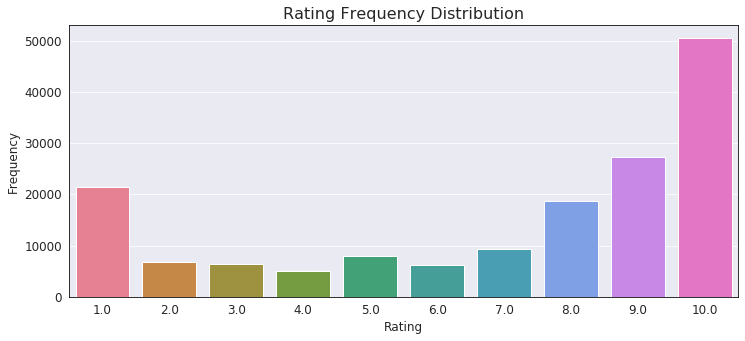

In [104]:
plt.figure(figsize=(12,5))
sns.countplot(x='rating', data=train, palette=sns.color_palette("husl", 10))
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Frequency Distribution')
plt.show();

There seems to be a majority of the reviews on the positive side (7-10) compared to the neutral (4-6) or negative (1-3) sides. This could lead to a class imbalance is we use the rating column as our labels (seperated into 3 categories), so we may want to account for `usefulCount` when creating our class labels (but this will be taken care of later on).

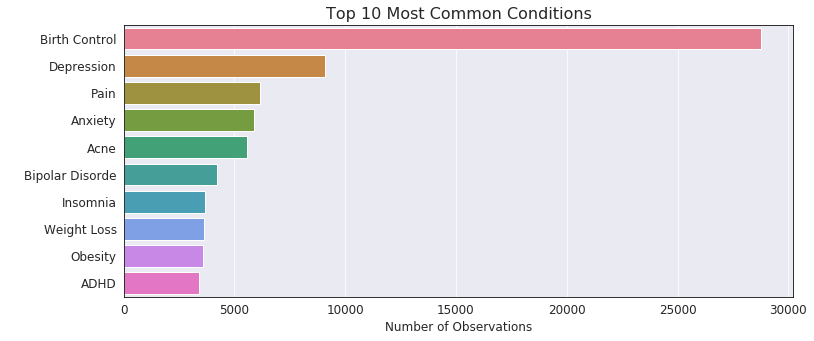

In [103]:
top10_condition = train.groupby('condition').agg('count').sort_values(by ='drugName', ascending=False)[:10]

plt.figure(figsize=(12,5))
sns.barplot(y=top10_condition['index'].index, x=top10_condition['index'].values, palette=sns.color_palette("husl", 10))
plt.xlabel('Number of Observations')
plt.ylabel(' ')
plt.title('Top 10 Most Common Conditions')
plt.show();

Birth control seems to be the most common condition by at least 3x, followed by Depression and Pain. These conditions related to perscription drugs are expected and there was no suprises in the findings. We may want to look at the distribution of `drugName` for Birth control to better understand the observations.